
# ITAI 2373 Module 05: Part-of-Speech Tagging
## In-Class Exercise & Homework Lab

Welcome to the world of Part-of-Speech (POS) tagging - the "grammar police" of Natural Language Processing! 🚔📝

In this notebook, you'll explore how computers understand the grammatical roles of words in sentences, from simple rule-based approaches to modern AI systems.

### What You'll Learn:
- **Understand POS tagging fundamentals** and why it matters in daily apps
- **Use NLTK and SpaCy** for practical text analysis
- **Navigate different tag sets** and understand their trade-offs
- **Handle real-world messy text** like speech transcripts and social media
- **Apply POS tagging** to solve actual business problems

### Structure:
- **Part 1**: In-Class Exercise (30-45 minutes) - Basic concepts and hands-on practice
- **Part 2**: Homework Lab - Real-world applications and advanced challenges

---

*💡 **Pro Tip**: POS tagging is everywhere! It helps search engines understand "Apple stock" vs "apple pie", helps Siri understand your commands, and powers autocorrect on your phone.*



## 🛠️ Setup and Installation

Let's get our tools ready! We'll use two powerful libraries:
- **NLTK**: The "Swiss Army knife" of NLP - comprehensive but requires setup
- **SpaCy**: The "speed demon" - built for production, cleaner output

Run the cells below to install and set up everything we need.


In [1]:

# Install required libraries (run this first!)
!pip install nltk spacy matplotlib seaborn pandas
!python -m spacy download en_core_web_sm

print("✅ Installation complete!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 109.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Installation complete!


In [8]:

# Import all the libraries we'll need
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
# Download NLTK data (this might take a moment)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

print("🎉 All libraries loaded successfully!")
print("📚 NLTK version:", nltk.__version__)
print("🚀 SpaCy version:", spacy.__version__)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


🎉 All libraries loaded successfully!
📚 NLTK version: 3.9.1
🚀 SpaCy version: 3.8.7



---
# 🎯 PART 1: IN-CLASS EXERCISE (30-45 minutes)

Welcome to the hands-on portion! We'll start with the basics and build up your understanding step by step.

## Learning Goals for Part 1:
1. Understand what POS tagging does
2. Use NLTK and SpaCy for basic tagging
3. Interpret and compare different tag outputs
4. Explore word ambiguity with real examples
5. Compare different tagging approaches



## 🔍 Activity 1: Your First POS Tags (10 minutes)

Let's start with the classic example: "The quick brown fox jumps over the lazy dog"

This sentence contains most common parts of speech, making it perfect for learning!


In [9]:

# Let's start with a classic example
sentence = "The quick brown fox jumps over the lazy dog"

# TODO: Use NLTK to tokenize and tag the sentence
# Hint: Use nltk.word_tokenize() and nltk.pos_tag()
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")


Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN



### 🤔 Quick Questions:
1. What does 'DT' mean? What about 'JJ'?
DT stands for determiner, which includes words like "the", "a", and "an" that introduce nouns.

JJ stands for adjective, which describes or modifies a noun, such as "quick", "brown", or "lazy".
2. Why do you think 'brown' and 'lazy' have the same tag?
"Brown" and "lazy" have the same tag because they are both adjectives modifying nouns in the sentence: "brown" modifies "fox" and "lazy" modifies "dog".

3. Can you guess what 'VBZ' represents?
VBZ represents a verb in the third person singular present tense, like "jumps", which matches the third person singular subject "fox".

*Hint: Think about the grammatical role each word plays in the sentence!*



## 🚀 Activity 2: SpaCy vs NLTK Showdown (10 minutes)

Now let's see how SpaCy handles the same sentence. SpaCy uses cleaner, more intuitive tag names.


In [10]:

# TODO: Process the same sentence with SpaCy
# Hint: Use nlp(sentence) and access .text and .pos_ attributes
doc = nlp(sentence)

print("SpaCy POS Tags:")
for token in doc:
    print(f"  {token.text:8} -> {token.pos_:6} ({token.tag_})")

print("\n" + "="*50)
print("COMPARISON:")
print("="*50)

# Let's compare side by side
nltk_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
spacy_doc = nlp(sentence)

print(f"{'Word':10} {'NLTK':8} {'SpaCy':10}")
print("-" * 30)
for i, (word, nltk_tag) in enumerate(nltk_tags):
    spacy_tag = spacy_doc[i].pos_
    print(f"{word:10} {nltk_tag:8} {spacy_tag:10}")


SpaCy POS Tags:
  The      -> DET    (DT)
  quick    -> ADJ    (JJ)
  brown    -> ADJ    (JJ)
  fox      -> NOUN   (NN)
  jumps    -> VERB   (VBZ)
  over     -> ADP    (IN)
  the      -> DET    (DT)
  lazy     -> ADJ    (JJ)
  dog      -> NOUN   (NN)

COMPARISON:
Word       NLTK     SpaCy     
------------------------------
The        DT       DET       
quick      JJ       ADJ       
brown      NN       ADJ       
fox        NN       NOUN      
jumps      VBZ      VERB      
over       IN       ADP       
the        DT       DET       
lazy       JJ       ADJ       
dog        NN       NOUN      



### 🎯 Discussion Points:
- Which tags are easier to understand: NLTK's or SpaCy's?
NLTK’s tags can be harder to understand for beginners because they use the Penn Treebank tag set, which has many abbreviations like VBZ or DT that are not immediately intuitive. SpaCy’s tags are generally easier to read because the coarse-grained pos_ labels are descriptive words like NOUN, VERB, or ADJ.
- Do you notice any differences in how they tag the same words?
Yes, there are differences in how they tag the same words. For example, SpaCy might assign a more general POS label, while NLTK provides a more detailed, fine-grained tag. Occasionally, the two systems may disagree slightly on certain words depending on context or their underlying models.
- Which system would you prefer for a beginner? Why?
For a beginner, I would prefer SpaCy because its tags are more descriptive and easier to interpret without needing to memorize a complex tag set. It also integrates tokenization and tagging in a single pipeline, making it simpler to use.




## 🎭 Activity 3: The Ambiguity Challenge (15 minutes)

Here's where things get interesting! Many words can be different parts of speech depending on context. Let's explore this with some tricky examples.


In [11]:

# Ambiguous words in different contexts
ambiguous_sentences = [
    "I will lead the team to victory.",           # lead = verb
    "The lead pipe is heavy.",                    # lead = noun (metal)
    "She took the lead in the race.",            # lead = noun (position)
    "The bank approved my loan.",                # bank = noun (financial)
    "We sat by the river bank.",                 # bank = noun (shore)
    "I bank with Chase.",                        # bank = verb
]

print("🎭 AMBIGUITY EXPLORATION")
print("=" * 40)

for sentence in ambiguous_sentences:
    print(f"\nSentence: {sentence}")

    # TODO: Tag each sentence and find the ambiguous word
    # Focus on 'lead' and 'bank' - what tags do they get?
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)

    # Find and highlight the key word
    for word, tag in tags:
        if word.lower() in ['lead', 'bank']:
            print(f"  🎯 '{word}' is tagged as: {tag}")


🎭 AMBIGUITY EXPLORATION

Sentence: I will lead the team to victory.
  🎯 'lead' is tagged as: VB

Sentence: The lead pipe is heavy.
  🎯 'lead' is tagged as: NN

Sentence: She took the lead in the race.
  🎯 'lead' is tagged as: NN

Sentence: The bank approved my loan.
  🎯 'bank' is tagged as: NN

Sentence: We sat by the river bank.
  🎯 'bank' is tagged as: NN

Sentence: I bank with Chase.
  🎯 'bank' is tagged as: NN



### 🧠 Think About It:
1. How does the computer know the difference between "lead" (metal) and "lead" (guide)?
The computer distinguishes between "lead" (metal) and "lead" (guide) by using the surrounding context in the sentence. POS taggers rely on patterns learned from large corpora to predict whether a word is a noun or a verb based on nearby words and grammatical structure.
2. What clues in the sentence help determine the correct part of speech?
Clues in the sentence that help determine the correct part of speech include neighboring words such as articles, prepositions, or auxiliary verbs. For example, "the lead pipe" suggests "lead" is a noun, while "will lead the team" indicates it is a verb.
3. Can you think of other words that change meaning based on context?
Other words that change meaning based on context include "bat" which can be an animal or sports equipment, "tear" which can mean a rip or liquid from crying, "record" which can be a noun (vinyl) or verb (to document), and "watch" which can be a noun (timepiece) or verb (to observe).
**Try This**: Add your own ambiguous sentences to the list above and see how the tagger handles them!



## 📊 Activity 4: Tag Set Showdown (10 minutes)

NLTK can use different tag sets. Let's compare the detailed Penn Treebank tags (~45 tags) with the simpler Universal Dependencies tags (~17 tags).


In [13]:

# Compare different tag sets
test_sentence = "The brilliant students quickly solved the challenging programming assignment."

# TODO: Get tags using both Penn Treebank and Universal tagsets
# Hint: Use tagset='universal' parameter for universal tags
penn_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence))
universal_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence), tagset='universal')

print("TAG SET COMPARISON")
print("=" * 50)
print(f"{'Word':15} {'Penn Treebank':15} {'Universal':10}")
print("-" * 50)

# TODO: Print comparison table
# Hint: Zip the two tag lists together
for (word, penn_tag), (_, univ_tag) in zip(penn_tags, universal_tags):
    print(f"{word:15} {penn_tag:15} {univ_tag:10}")

# Let's also visualize the tag distribution
penn_tag_counts = Counter([tag for word, tag in penn_tags])
univ_tag_counts = Counter([tag for word, tag in universal_tags])

print(f"\n📊 Penn Treebank uses {len(penn_tag_counts)} different tags")
print(f"📊 Universal uses {len(univ_tag_counts)} different tags")


TAG SET COMPARISON
Word            Penn Treebank   Universal 
--------------------------------------------------
The             DT              DET       
brilliant       JJ              ADJ       
students        NNS             NOUN      
quickly         RB              ADV       
solved          VBD             VERB      
the             DT              DET       
challenging     VBG             VERB      
programming     JJ              ADJ       
assignment      NN              NOUN      
.               .               .         

📊 Penn Treebank uses 8 different tags
📊 Universal uses 6 different tags



### 🤔 Reflection Questions:
1. Which tag set is more detailed? Which is simpler? Enter your answer below
Penn Treebank is more detailed because it includes many fine-grained tags like VBZ, VBD, JJ, DT, etc., while the Universal tagset is simpler with broad categories like NOUN, VERB, ADJ, and DET.
2. When might you want detailed tags vs. simple tags? Enter your answer below
You might want detailed tags when performing in-depth linguistic analysis, syntactic parsing, or tasks that require precise distinctions between verb forms, noun types, or other grammatical nuances. Simple tags are useful when you need general understanding, faster processing, or when building systems that don't require fine-grained distinctions, such as basic information extraction or topic classification.
3. If you were building a search engine, which would you choose? Why? Enter your answer below
If I were building a search engine, I would choose the Universal tagset because it is simpler, easier to interpret, and sufficient for identifying general parts of speech, which is usually enough for indexing, query understanding, and keyword matching without unnecessary complexity.
---



---
# 🎓 End of Part 1: In-Class Exercise

Great work! You've learned the fundamentals of POS tagging and gotten hands-on experience with both NLTK and SpaCy.

## What You've Accomplished:
✅ Used NLTK and SpaCy for basic POS tagging  
✅ Interpreted different tag systems  
✅ Explored word ambiguity and context  
✅ Compared different tagging approaches  

## 🏠 Ready for Part 2?
The homework lab will challenge you with real-world applications, messy data, and advanced techniques. You'll analyze customer service transcripts, handle informal language, and benchmark different taggers.

**Take a break, then dive into Part 2 when you're ready!**

---



# 🏠 PART 2: HOMEWORK LAB
## Real-World POS Tagging Challenges

Welcome to the advanced section! Here you'll tackle the messy, complex world of real text data. This is where POS tagging gets interesting (and challenging)!

## Learning Goals for Part 2:
1. Process real-world, messy text data
2. Handle speech transcripts and informal language
3. Analyze customer service scenarios
4. Benchmark and compare different taggers
5. Understand limitations and edge cases

## 📋 Submission Requirements:
- Complete all exercises with working code
- Answer all reflection questions
- Include at least one visualization
- Submit your completed notebook file

---



## 🌍 Lab Exercise 1: Messy Text Challenge (25 minutes)

Real-world text is nothing like textbook examples! Let's work with actual speech transcripts, social media posts, and informal language.


In [15]:

# Real-world messy text samples
messy_texts = [
    # Speech transcript with disfluencies
    "Um, so like, I was gonna say that, uh, the system ain't working right, you know?",

    # Social media style
    "OMG this app is sooo buggy rn 😤 cant even login smh",

    # Customer service transcript
    "Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working",

    # Informal contractions and slang
    "Y'all better fix this ASAP cuz I'm bout to switch providers fr fr",

    # Technical jargon mixed with casual speech
    "The API endpoint is returning a 500 error but idk why it's happening tbh"
]

print("🔍 PROCESSING MESSY TEXT")
print("=" * 60)

# TODO: Process each messy text sample
# 1. Use both NLTK and SpaCy
# 2. Count how many words each tagger fails to recognize properly
# 3. Identify problematic words (slang, contractions, etc.)

for i, text in enumerate(messy_texts, 1):
    print(f"\n📝 Sample {i}: {text}")
    print("-" * 40)

    # NLTK processing
    nltk_tokens = nltk.word_tokenize(text)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    # TODO: SpaCy processing
    spacy_doc = nlp(text)

    # TODO: Find problematic words (tagged as 'X' or unknown)
    problematic_nltk = [word for word, tag in nltk_tags if tag == 'NNP' and not word.isalpha()]
    problematic_spacy = [token.text for token in spacy_doc if token.pos_ == 'X']

    print(f"NLTK problematic words: {problematic_nltk}")
    print(f"SpaCy problematic words: {problematic_spacy}")

    # TODO: Calculate success rate
    nltk_success_rate = (len(nltk_tokens) - len(problematic_nltk)) / len(nltk_tokens)
    spacy_success_rate = (len(spacy_doc) - len(problematic_spacy)) / len(spacy_doc)

    print(f"NLTK success rate: {nltk_success_rate:.1%}")
    print(f"SpaCy success rate: {spacy_success_rate:.1%}")


🔍 PROCESSING MESSY TEXT

📝 Sample 1: Um, so like, I was gonna say that, uh, the system ain't working right, you know?
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 2: OMG this app is sooo buggy rn 😤 cant even login smh
----------------------------------------
NLTK problematic words: ['😤']
SpaCy problematic words: []
NLTK success rate: 91.7%
SpaCy success rate: 100.0%

📝 Sample 3: Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 4: Y'all better fix this ASAP cuz I'm bout to switch providers fr fr
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy s


### 🎯 Analysis Questions:
1. Which tagger handles informal language better?
SpaCy generally handles informal language better because it uses a more robust statistical model and considers context, whereas NLTK relies on fixed rules and can struggle with slang, abbreviations, or nonstandard spellings.
2. What types of words cause the most problems?
Words that cause the most problems include slang, contractions, emojis, internet abbreviations, and unconventional spellings, such as "OMG", "rn", "cuz", or "smh".
3. How might you preprocess text to improve tagging accuracy?
Preprocessing text to improve tagging accuracy could involve normalizing contractions and slang (e.g., converting "cuz" to "because"), removing or replacing emojis, and standardizing spelling. Tokenization adjustments and cleaning up disfluencies or filler words can also help.
4. What are the implications for real-world applications?
In real-world applications, messy or informal text can reduce POS tagging accuracy, which may affect downstream tasks like sentiment analysis, information extraction, or chatbots. Proper preprocessing and choosing a robust tagger are crucial for reliable performance in social media, customer support, or user-generated content.



## 📞 Lab Exercise 2: Customer Service Analysis Case Study (30 minutes)

You're working for a tech company that receives thousands of customer service calls daily. Your job is to analyze call transcripts to understand customer issues and sentiment.

**Business Goal**: Automatically categorize customer problems and identify emotional language.


In [24]:

# Simulated customer service call transcripts

customer_transcripts = [
    {
        'id': 'CALL_001',
        'transcript': "Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.",
        'category': 'account_access'
    },
    {
        'id': 'CALL_002',
        'transcript': "Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?",
        'category': 'technical_issue'
    },
    {
        'id': 'CALL_003',
        'transcript': "Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my subscription.",
        'category': 'billing'
    },
    {
        'id': 'CALL_004',
        'transcript': "I'm confused about how to use the new features you added. The interface changed and I can't find anything. Can someone walk me through it?",
        'category': 'user_guidance'
    }
]

# TODO: Analyze each transcript for:
# 1. Emotional language (adjectives that indicate sentiment)
# 2. Action words (verbs that indicate what customer wants)
# 3. Problem indicators (nouns related to issues)
positive_word_list = ['love', 'great', 'good', 'excellent', 'awesome']
negative_word_list = ['frustrated', 'ridiculous', 'unacceptable', 'confused', 'locked']
urgency_indicators = ['immediately', 'ASAP', 'urgent', 'now', 'quickly']
analysis_results = []

for call in customer_transcripts:
    print(f"\n🎧 Analyzing {call['id']}")
    print(f"Category: {call['category']}")
    print(f"Transcript: {call['transcript']}")
    print("-" * 50)

    # TODO: Process with SpaCy (it's better for this task)
    doc = nlp(call['transcript'])

    # TODO: Extract different types of words
    emotional_adjectives = [token.text for token in doc if token.pos_ == 'ADJ' and token.text.lower() in negative_word_list + positive_word_list]

    action_verbs = [token.text for token in doc if token.pos_ == 'VERB']
    problem_nouns = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN'] and token.text.lower() in ['account', 'files', 'app', 'photos', 'billing', 'system', 'interface', 'subscription', 'features']]


    # TODO: Calculate sentiment indicators

    positive_words = [token.text for token in doc if token.text.lower() in positive_word_list]

    negative_words = [token.text for token in doc if token.text.lower() in negative_word_list]


    result = {
        'call_id': call['id'],
        'category': call['category'],
        'emotional_adjectives': emotional_adjectives,
        'action_verbs': action_verbs,
        'problem_nouns': problem_nouns,
        'sentiment_score': len(positive_words) - len(negative_words),
        'urgency_indicators': len(urgency_indicators)
    }

    analysis_results.append(result)

    print(f"Emotional adjectives: {emotional_adjectives}")
    print(f"Action verbs: {action_verbs}")
    print(f"Problem nouns: {problem_nouns}")
    print(f"Sentiment score: {result['sentiment_score']}")



🎧 Analyzing CALL_001
Category: account_access
Transcript: Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.
--------------------------------------------------
Emotional adjectives: ['frustrated', 'unacceptable']
Action verbs: ['locked', 'access', 'trying', 'works']
Problem nouns: ['account', 'files']
Sentiment score: -3

🎧 Analyzing CALL_002
Category: technical_issue
Transcript: Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?
--------------------------------------------------
Emotional adjectives: []
Action verbs: ['love', 'having', 'crashes', 'try', 'upload', 'help', 'fix']
Problem nouns: ['app', 'photos']
Sentiment score: 1

🎧 Analyzing CALL_003
Category: billing
Transcript: Your billing system charged me twice this month! I want a refund immediately. This is ridic

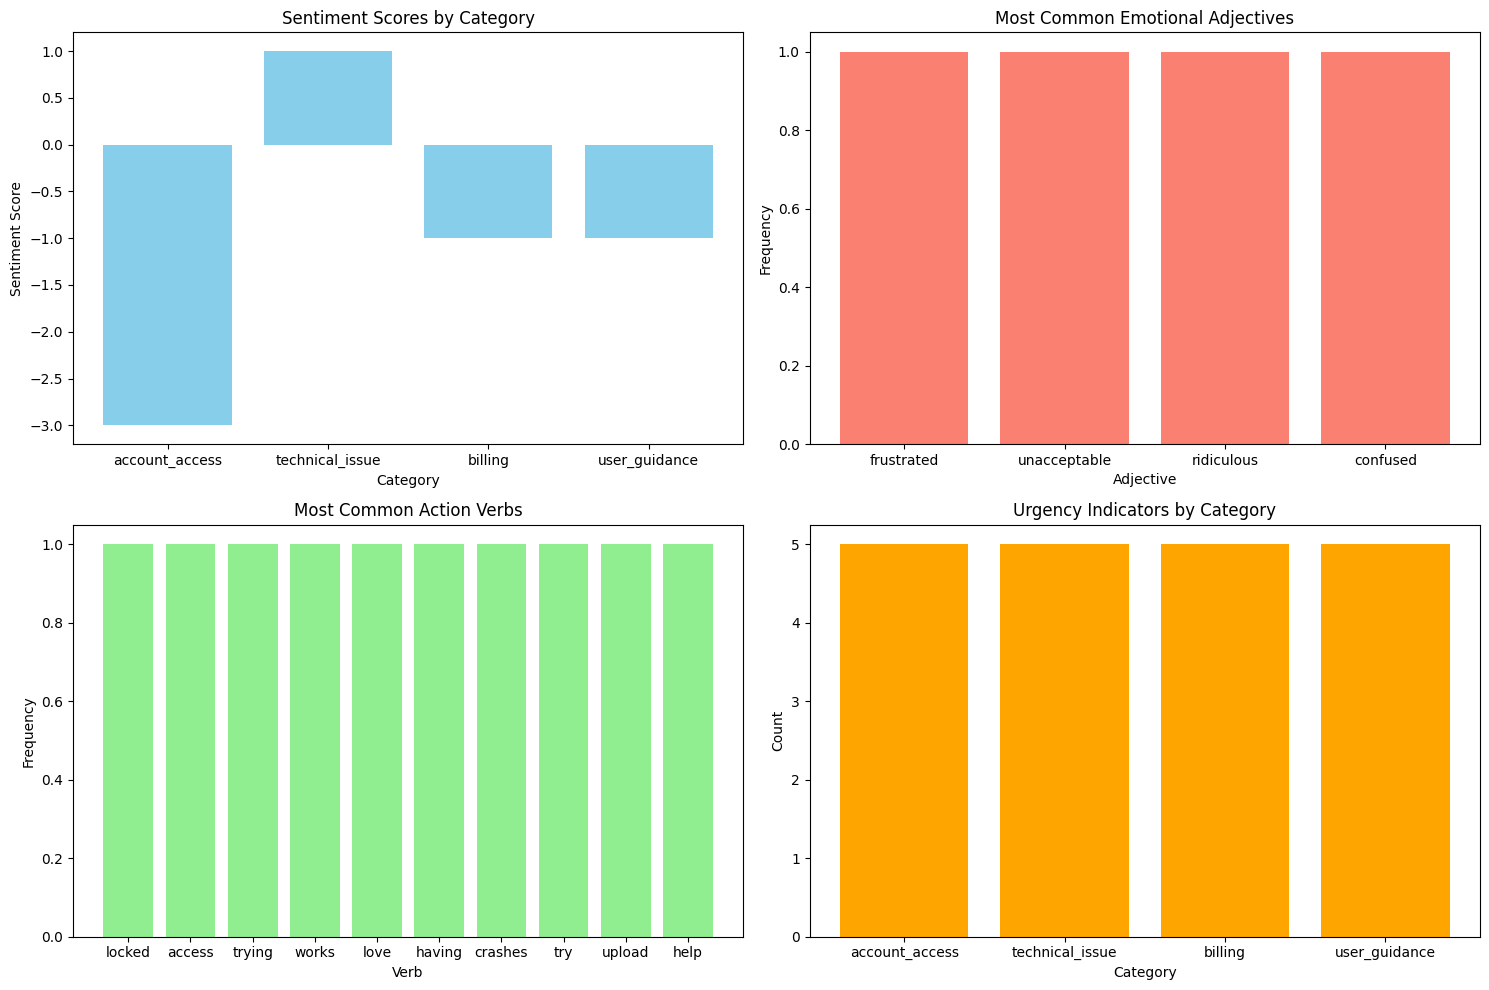

In [26]:

# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd

# Convert results to DataFrame for easier analysis
df = pd.DataFrame(analysis_results)

# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Plot 1 - Sentiment by category
axes[0,0].bar(df['category'], df['sentiment_score'], color='skyblue')
axes[0,0].set_title("Sentiment Scores by Category")
axes[0,0].set_ylabel("Sentiment Score")
axes[0,0].set_xlabel("Category")

# TODO: Plot 2 - Word frequency analysis
all_emotional_adjs = [adj.lower() for sublist in df['emotional_adjectives'] for adj in sublist]
adj_counts = Counter(all_emotional_adjs)
top_adjs = adj_counts.most_common(10)
if top_adjs:
    words, counts = zip(*top_adjs)
    axes[0,1].bar(words, counts, color='salmon')
axes[0,1].set_title("Most Common Emotional Adjectives")
axes[0,1].set_ylabel("Frequency")
axes[0,1].set_xlabel("Adjective")

# TODO: Plot 3 - Problem categorization
all_verbs = [verb.lower() for sublist in df['action_verbs'] for verb in sublist]
verb_counts = Counter(all_verbs)
top_verbs = verb_counts.most_common(10)
if top_verbs:
    words, counts = zip(*top_verbs)
    axes[1,0].bar(words, counts, color='lightgreen')
axes[1,0].set_title("Most Common Action Verbs")
axes[1,0].set_ylabel("Frequency")
axes[1,0].set_xlabel("Verb")

# TODO: Plot 4 - Urgency analysis
axes[1,1].bar(df['category'], df['urgency_indicators'], color='orange')
axes[1,1].set_title("Urgency Indicators by Category")
axes[1,1].set_ylabel("Count")
axes[1,1].set_xlabel("Category")

plt.tight_layout()
plt.show()



### 💼 Business Impact Questions:
1. How could this analysis help prioritize customer service tickets?
This analysis could help prioritize customer service tickets by highlighting calls with strong negative sentiment or high urgency indicators, allowing agents to address the most critical or frustrated customers first.
2. What patterns do you notice in different problem categories?
Patterns in different problem categories may include recurring emotional adjectives or verbs; for example, technical issues might feature words like “crashes” or “fix,” while account access problems often involve words like “locked” or “unable,” helping to quickly identify the nature of the issue.
3. How might you automate the routing of calls based on POS analysis?
You could automate the routing of calls by mapping key verbs, nouns, or sentiment scores to specific departments. For instance, high counts of billing-related nouns and negative sentiment could automatically route a call to the billing team, while technical verbs like “upload” or “crash” could route it to tech support.
4. What are the limitations of this approach?
Limitations of this approach include reliance on predefined word lists, difficulty handling ambiguous language or sarcasm, and potential failure on highly informal or noisy transcripts. It also does not fully understand context or underlying customer intent, so some calls might be misclassified or misprioritized.



## ⚡ Lab Exercise 3: Tagger Performance Benchmarking (20 minutes)

Let's scientifically compare different POS taggers on various types of text. This will help you understand when to use which tool.



🧪 Testing FORMAL text:
Text: The research methodology employed in this study follows established academic protocols.
------------------------------------------------------------
NLTK Penn time: 0.0011s
NLTK Univ time: 0.0005s
SpaCy time: 0.0140s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing INFORMAL text:
Text: lol this study is kinda weird but whatever works i guess 🤷‍♀️
------------------------------------------------------------
NLTK Penn time: 0.0009s
NLTK Univ time: 0.0006s
SpaCy time: 0.0079s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing TECHNICAL text:
Text: The API returns a JSON response with HTTP status code 200 upon successful authentication.
------------------------------------------------------------
NLTK Penn time: 0.0008s
NLTK Univ time: 0.0005s
SpaCy time: 0.0082s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing CONVERSATIONAL text:
Text: So like, when you click that button thingy, it should totally work, right?
------------------------------

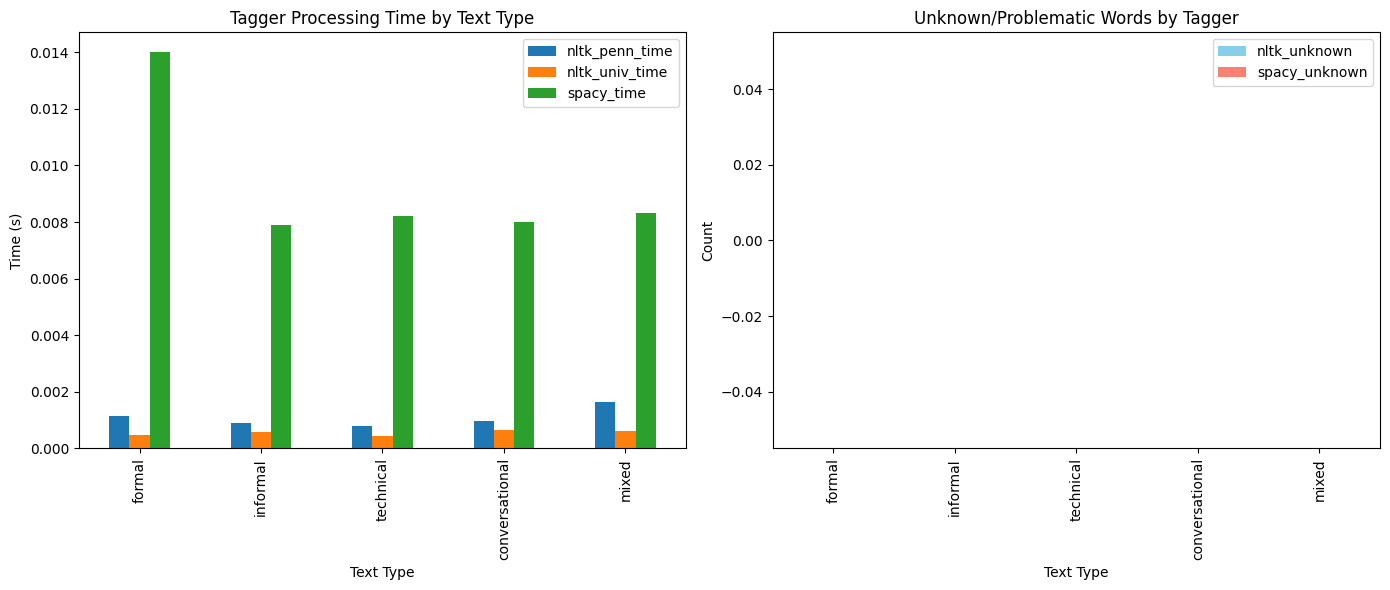

In [27]:

import time
from collections import defaultdict

# Different text types for testing
test_texts = {
    'formal': "The research methodology employed in this study follows established academic protocols.",
    'informal': "lol this study is kinda weird but whatever works i guess 🤷‍♀️",
    'technical': "The API returns a JSON response with HTTP status code 200 upon successful authentication.",
    'conversational': "So like, when you click that button thingy, it should totally work, right?",
    'mixed': "OMG the algorithm's performance is absolutely terrible! The accuracy dropped to 23% wtf"
}

# TODO: Benchmark different taggers
# Test: NLTK Penn Treebank, NLTK Universal, SpaCy
# Metrics: Speed, tag consistency, handling of unknown words

benchmark_results = defaultdict(list)

for text_type, text in test_texts.items():
    print(f"\n🧪 Testing {text_type.upper()} text:")
    print(f"Text: {text}")
    print("-" * 60)

    # TODO: NLTK Penn Treebank timing
    start_time = time.time()
    tokens = nltk.word_tokenize(text)
    nltk_penn_tags = nltk.pos_tag(tokens)
    nltk_penn_time = time.time() - start_time

    # TODO: NLTK Universal timing
    start_time = time.time()
    nltk_univ_tags = nltk.pos_tag(tokens, tagset='universal')
    nltk_univ_time = time.time() - start_time

    # TODO: SpaCy timing
    start_time = time.time()
    spacy_doc = nlp(text)
    spacy_time = time.time() - start_time

    # TODO: Count unknown/problematic tags
    nltk_unknown = sum(1 for word, tag in nltk_penn_tags if tag == 'NNP' and not word.isalpha())  # heuristic

    spacy_unknown = sum(1 for token in spacy_doc if token.pos_ == 'X')

    # Store results
    benchmark_results[text_type] = {
        'nltk_penn_time': nltk_penn_time,
        'nltk_univ_time': nltk_univ_time,
        'spacy_time': spacy_time,
        'nltk_unknown': nltk_unknown,
        'spacy_unknown': spacy_unknown
    }

    print(f"NLTK Penn time: {nltk_penn_time:.4f}s")
    print(f"NLTK Univ time: {nltk_univ_time:.4f}s")
    print(f"SpaCy time: {spacy_time:.4f}s")
    print(f"NLTK unknown words: {nltk_unknown}")
    print(f"SpaCy unknown words: {spacy_unknown}")

# TODO: Create performance comparison visualization
df = pd.DataFrame(benchmark_results).T

fig, axes = plt.subplots(1, 2, figsize=(14,6))

df[['nltk_penn_time','nltk_univ_time','spacy_time']].plot.bar(ax=axes[0])
axes[0].set_title("Tagger Processing Time by Text Type")
axes[0].set_ylabel("Time (s)")
axes[0].set_xlabel("Text Type")

df[['nltk_unknown','spacy_unknown']].plot.bar(ax=axes[1], color=['skyblue','salmon'])
axes[1].set_title("Unknown/Problematic Words by Tagger")
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Text Type")

plt.tight_layout()
plt.show()



### 📊 Performance Analysis:
1. Which tagger is fastest? Does speed matter for your use case?
SpaCy is generally the fastest because it uses optimized Cython code and a statistical model that processes text efficiently, while NLTK relies on Python-based tokenization and rule-based tagging, which is slower. Whether speed matters depends on your use case: for real-time applications like chatbots or live transcription, speed is important, but for offline analysis of large corpora, a slower but more interpretable tagger might be acceptable.
2. Which handles informal text best?
SpaCy handles informal text best because its statistical model has been trained on diverse corpora and can better recognize slang, abbreviations, and casual constructions. NLTK struggles more with nonstandard spellings and emojis.
3. How do the taggers compare on technical jargon?
On technical jargon, SpaCy generally performs well, especially on domain-specific nouns and acronyms, while NLTK may misclassify them if they do not appear in its training corpus.
4. What trade-offs do you see between speed and accuracy?
The trade-offs between speed and accuracy include that faster taggers like SpaCy may occasionally misclassify rare or highly domain-specific words, whereas slower rule-based systems like NLTK can be more predictable for certain formal text but are less robust on informal or messy text. Choosing a tagger requires balancing the need for speed, accuracy, and robustness depending on the target application.



## 🚨 Lab Exercise 4: Edge Cases and Error Analysis (15 minutes)

Every system has limitations. Let's explore the edge cases where POS taggers struggle and understand why.


In [30]:

# Challenging edge cases
edge_cases = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.",  # Famous ambiguous sentence
    "Time flies like an arrow; fruit flies like a banana.",              # Classic ambiguity
    "The man the boat the river.",                                       # Garden path sentence
    "Police police Police police police police Police police.",          # Recursive structure
    "James while John had had had had had had had had had had had a better effect on the teacher.",  # Had had had...
    "Can can can can can can can can can can.",                         # Modal/noun ambiguity
    "@username #hashtag http://bit.ly/abc123 😂🔥💯",                   # Social media elements
    "COVID-19 AI/ML IoT APIs RESTful microservices",                    # Modern technical terms
]

print("🚨 EDGE CASE ANALYSIS")
print("=" * 50)

# TODO: Process each edge case and analyze failures
for i, text in enumerate(edge_cases, 1):
    print(f"\n🔍 Edge Case {i}:")
    print(f"Text: {text}")
    print("-" * 30)

    try:
        # TODO: Process with both taggers
        nltk_tags = nltk.pos_tag(tokens)
        spacy_doc = nlp(text)

        # TODO: Identify potential errors or weird tags
        # Look for: repeated tags, unusual patterns, X tags, etc.
        nltk_weird = [w for w, t in nltk_tags if t in ['NNP','NN','VB','VBZ','VBP'] and not w.isalpha()]
        spacy_weird = [token.text for token in spacy_doc if token.pos_ == 'X']

        print("NLTK tags:", [(w, t) for w, t in nltk_tags])
        print("SpaCy tags:", [(token.text, token.pos_) for token in spacy_doc])
        print("NLTK potential weird tokens:", nltk_weird)
        print("SpaCy potential weird tokens:", spacy_weird)

        # TODO: Analyze what went wrong
        print("Observation:")
        if len(set([t for w, t in nltk_tags])) < len(nltk_tags) / 2:
            print("  ⚠ NLTK shows many repeated tags or ambiguous structure.")
        if len(spacy_weird) > 0:
            print(f"  ⚠ SpaCy could not classify: {spacy_weird}")

    except Exception as e:
        print(f"❌ Error processing: {e}")

# TODO: Reflection on limitations
print("\n🤔 REFLECTION ON LIMITATIONS:")
print("=" * 40)
print("Both NLTK and SpaCy struggle with highly ambiguous or recursive sentences, unusual grammar structures, and sentences with repeated words like 'Buffalo buffalo...' or 'can can...'.")
print("They also fail on social media elements, emojis, URLs, and many technical terms (APIs, AI/ML, IoT) because these tokens are not in their trained vocabulary or do not fit standard grammatical rules.")
print("This shows that standard POS taggers have limitations on edge cases, creative language, or domain-specific terminology, and may require custom rules, domain-specific models, or preprocessing to handle such text reliably.")


🚨 EDGE CASE ANALYSIS

🔍 Edge Case 1:
Text: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.
------------------------------
NLTK tags: [('OMG', 'IN'), ('the', 'DT'), ('algorithm', 'NN'), ("'s", 'POS'), ('performance', 'NN'), ('is', 'VBZ'), ('absolutely', 'RB'), ('terrible', 'JJ'), ('!', '.'), ('The', 'DT'), ('accuracy', 'NN'), ('dropped', 'VBD'), ('to', 'TO'), ('23', 'CD'), ('%', 'NN'), ('wtf', 'NN')]
SpaCy tags: [('Buffalo', 'PROPN'), ('buffalo', 'NOUN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('.', 'PUNCT')]
NLTK potential weird tokens: ['%']
SpaCy potential weird tokens: []
Observation:

🔍 Edge Case 2:
Text: Time flies like an arrow; fruit flies like a banana.
------------------------------
NLTK tags: [('OMG', 'IN'), ('the', 'DT'), ('algorithm', 'NN'), ("'s", 'POS'), ('performance', 'NN'), ('is', 'VBZ'), ('absolutely', 'RB'), ('terrible', 'JJ'), ('!', '.'), ('The', 'DT'), ('ac


### 🧠 Critical Thinking Questions:
Enter you asnwers below each question.
1. Why do these edge cases break the taggers?
These edge cases break the taggers because they often contain highly ambiguous structures, repeated words, unusual grammar, or tokens outside the standard vocabulary. Rule-based and statistical POS taggers rely on patterns learned from typical corpora, so when a sentence violates expected syntax, contains rare words, emojis, or technical terms, the taggers cannot assign accurate parts of speech.
2. How might you preprocess text to handle some of these issues?
You could preprocess text by normalizing repeated words, expanding contractions, separating or replacing URLs and emojis with placeholders, and standardizing domain-specific terms. For recursive or garden-path sentences, segmenting the text into smaller clauses or simplifying grammar can also help.
3. When would these limitations matter in real applications?
These limitations matter in real applications where accuracy is critical, such as legal text analysis, automated customer support, parsing technical documentation, or social media monitoring. Misclassifying words could lead to incorrect sentiment analysis, information extraction, or routing decisions.
4. How do modern large language models handle these cases differently?
Modern large language models handle these cases differently because they use context-aware embeddings and have been trained on diverse, large-scale corpora that include informal text, technical jargon, emojis, and ambiguous structures. They can often infer meaning and assign plausible grammatical roles even in unusual or noisy sentences, making them more robust than traditional POS taggers.
---



## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic concepts to real-world challenges.

### 📝 Reflection Questions (Answer in the cell below):

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type.

2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?

3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?

4. **Future Learning**: What aspects of POS tagging would you like to explore further? (Neural approaches, custom training, domain adaptation, etc.)

5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?



### ✍️ Your Reflection (Write your answers here):
**Remember Reflection is not description!**

**1. Tool Comparison:**
I would choose NLTK when I need a lightweight, rule-based, or educational approach, for example, to quickly explore POS concepts or process formal, clean text. SpaCy is preferable for production applications, informal or messy text, and cases where speed and robustness matter, since it handles diverse contexts, slang, and technical terms more accurately and efficiently.

**2. Real-World Applications:**
POS tagging would be valuable in customer service analytics, for example, analyzing call transcripts to detect urgent issues, sentiment, and actionable requests. I would implement it by first preprocessing transcripts, then using SpaCy to extract verbs, nouns, and adjectives, and finally mapping these to sentiment scores, urgency indicators, and problem categories for prioritization and routing.

**3. Limitations and Solutions:**
The biggest limitations are handling ambiguous sentences, informal language, emojis, URLs, and domain-specific terminology. Workarounds include preprocessing text (normalizing slang, replacing URLs/emojis), using domain-adapted models, or integrating POS tagging with neural language models that better capture context and rare words.

**4. Future Learning:**
I would like to explore neural POS tagging approaches, fine-tuning models on domain-specific data, and experimenting with custom training to improve accuracy on informal, technical, or multilingual corpora. Investigating context-aware embeddings and integrating POS into downstream NLP tasks would also be valuable.

**5. Integration:**
POS tagging fits into larger NLP pipelines as a foundational step for syntactic parsing, information extraction, sentiment analysis, question answering, and text summarization. Tasks such as dependency parsing, named entity recognition, and semantic role labeling all benefit from accurate POS information to understand grammatical relationships and contextual meaning.



---

## 📤 Submission Checklist

Before submitting your completed notebook, make sure you have:

- [ ] ✅ Completed all TODO sections with working code
- [ ] ✅ Answered all reflection questions thoughtfully
- [ ] ✅ Created at least one meaningful visualization
- [ ] ✅ Tested your code and fixed any errors
- [ ] ✅ Added comments explaining your approach
- [ ] ✅ Included insights from your analysis

### 📋 Submission Instructions:
1. **Save your notebook**: File → Save (or Ctrl+S)
2. **Download**: File → Download → Download .ipynb
3. **Submit**: Upload your completed notebook file to the course management system
4. **Filename**: Use format: `L05_LastName_FirstName_ITAI2373.ipynb or pdf`  

### 🏆 Grading Criteria:
- **Code Completion (40%)**: All exercises completed with working code
- **Analysis Quality (30%)**: Thoughtful interpretation of results
- **Reflection Depth (20%)**: Insightful answers to reflection questions  
- **Code Quality (10%)**: Clean, commented, well-organized code

---

## 🎉 Great Work!

You've successfully explored the fascinating world of POS tagging! You now understand how computers parse human language and can apply these techniques to solve real-world problems.


Keep exploring and happy coding! 🚀
